# やりたいこと

- 必要なライブラリと準備
- OpenFOAMのデータの取得（○○mの速度分布）
- 理論計算の記述
- OpenFOAMと理論計算の比較（○○mの速度分布）
- 画像データとして出力

# 必要なライブラリと準備

必要なライブラリをインポート

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
from pathlib import Path

フォルダ内に複数のファイルがある場合に以下の関数を使って昇順に並び替えてリスト化する

In [15]:
# 文字列を含む要素を数字で昇順にする関数
def atoi(text):
    print(text)
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)^', text) ]

# 数字であるかどうかの判定
def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def custom_sort_key(file_name):
    # ファイル名から数字部分を抽出して返す
    match = re.search(r'(-?\d+)', file_name)
    if match:
        return int(match.group())
    return file_name

# 外枠を描く

(0.0, 3.0)

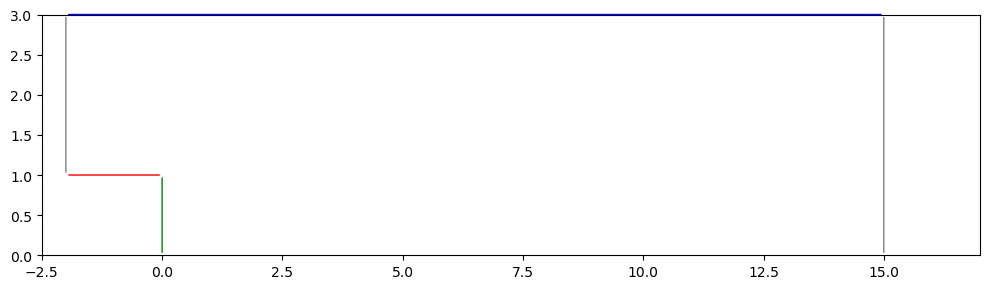

In [53]:
# グラフのセット    
fig, axes = plt.subplots(1, 1, figsize=(10,3), tight_layout=True)
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.6)

"""gnuplot
set xrange [ -2.5 : 17 ]
set yrange [ 0 : 3 ]
set arrow from -2,3 to 15,3 nohead lw 3 lc rgb "blue"
set arrow from -2,1 to 0,1 nohead lw 3 lc rgb "red"
set arrow from 0,1 to 0,0 nohead lw 3 lc rgb "green"
set arrow from 0,0 to 15,0 nohead lw 3 lc rgb "black"
set arrow from 15,0 to 15,3 nohead lw 3 lt 0
set arrow from -2,1 to -2,3 nohead lw 3 lt 0
"""
# 枠の始点と終点をリスト化
point_list = [
    {'start': [-2, 3],'end': [15, 3], 'color': 'blue'},
    {'start': [-2, 1],'end': [ 0, 1], 'color': 'red'},
    {'start': [ 0, 1],'end': [ 0, 0], 'color': 'green'},
    {'start': [15, 0],'end': [15, 3], 'color': 'gray'},
    {'start': [-2, 1],'end': [-2, 3], 'color': 'gray'},
]

# 枠を作成
for point in point_list:
    axes.annotate('', xy=point['end'], xytext=point['start'],
                arrowprops=dict(arrowstyle='-', 
                                connectionstyle='arc3', 
                                facecolor=point['color'], 
                                edgecolor=point['color'])
           )
# 軸の範囲の設定
axes.set_xlim([-2.5, 17])
axes.set_ylim([0, 3])

# OpenFOAMのデータの取得（○○mの速度分布）

In [3]:
resultDir = Path("../postProcessing/sampleDict")  # 計算フォルダ
latestTime = sorted([a for a in os.listdir(resultDir) if is_int(a)], key=float)[-1] # latestTimeを抜き出す
sampleDictdata = resultDir/ latestTime

sampleDictdata

PosixPath('../postProcessing/sampleDict/1000')

In [26]:
# x=からはじまるデータのみが必要
caseList = [data for data in os.listdir(sampleDictdata) if "x=" in data]
caseList = sorted(caseList, key=custom_sort_key)

for zCase in caseList:
    print(zCase)

x=-2H_k_U.xy
x=-1H_k_U.xy
x=0H_k_U.xy
x=1H_k_U.xy
x=2H_k_U.xy
x=3H_k_U.xy
x=4H_k_U.xy
x=5H_k_U.xy
x=6H_k_U.xy
x=7H_k_U.xy
x=8H_k_U.xy
x=9H_k_U.xy
x=10H_k_U.xy
x=11H_k_U.xy
x=12H_k_U.xy
x=13H_k_U.xy
x=14H_k_U.xy
x=15H_k_U.xy


In [27]:
# OpenFOAMのデータをデータフレームで取得
df_cae = pd.read_table(sampleDictdata/caseList[0], index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))
df_cae.head()

,x[m],y[m],z[m],k[m2/s2],Ux[m/s],Uy[m/s],Uz[m/s]
0,-2,1.000,0.5,0.011979,0.591839,-0.001102,0
1,-2,1.125,0.5,0.008281,0.788730,-0.000921,0
2,-2,1.250,0.5,0.006448,0.852435,-0.000125,0
3,-2,1.375,0.5,0.005238,0.898480,-0.000479,0
4,-2,1.500,0.5,0.004296,0.937303,-0.000187,0


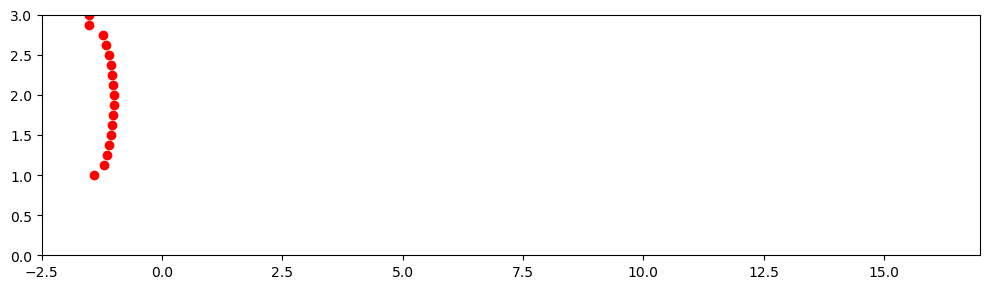

In [61]:
"""gnuplot
"< cat postProcessing/sampleDict/*/x=-2H_k_U.xy" using ($5/scale-2):2  title "CFD" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=-1H_k_U.xy" using ($5/scale-1):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=0H_k_U.xy" using ($5/scale  ):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=1H_k_U.xy" using ($5/scale+1):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=2H_k_U.xy" using ($5/scale+2):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=3H_k_U.xy" using ($5/scale+3):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=4H_k_U.xy" using ($5/scale+4):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=5H_k_U.xy" using ($5/scale+5):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=6H_k_U.xy" using ($5/scale+6):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=7H_k_U.xy" using ($5/scale+7):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=8H_k_U.xy" using ($5/scale+8):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=9H_k_U.xy" using ($5/scale+9):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=10H_k_U.xy" using ($5/scale+10):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=11H_k_U.xy" using ($5/scale+11):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=12H_k_U.xy" using ($5/scale+12):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=13H_k_U.xy" using ($5/scale+13):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=14H_k_U.xy" using ($5/scale+14):2  title "" with l lt 1 lc rgb "black", \
"< cat postProcessing/sampleDict/*/x=15H_k_U.xy" using ($5/scale+15):2  title "" with l lt 1 lc rgb "black"
"""
# グラフのセット    
fig, axes = plt.subplots(1, 1, figsize=(10,3), tight_layout=True)
# 軸の範囲の設定
axes.set_xlim([-2.5, 17])
axes.set_ylim([0, 3])

# 横軸：流速、縦軸：高さでプロット
df_cae = pd.read_table(sampleDictdata/caseList[0], index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))

# 横軸：流速、縦軸：動径方向でプロット
axes.scatter(df_cae["Ux[m/s]"]-2, df_cae["y[m]"], color="red", label="OpenFOAM")

In [64]:
file_name = "x=-2H_k_U.xy"  # ここに対象のファイル名を入力してください

match = re.search(r'(-?\d+)', file_name)
if match:
    extracted_number = int(match.group())
    print(extracted_number)
else:
    print("No number found in the file name.")

-2


In [73]:
len(caseList)

18

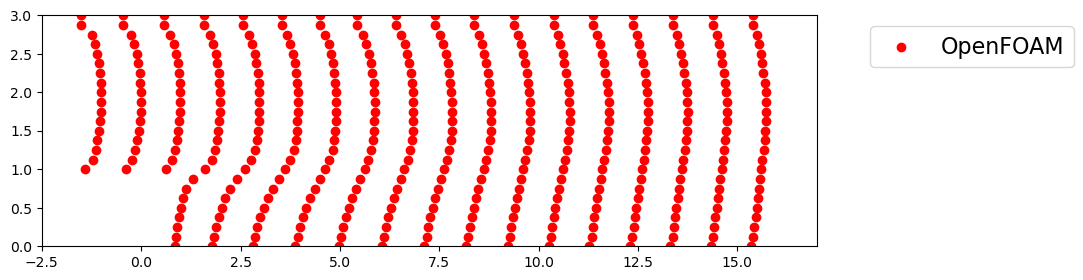

In [167]:
# グラフのセット    
fig, axes = plt.subplots(1, 1, figsize=(10,3))
# 軸の範囲の設定
axes.set_xlim([-2.5, 17])
axes.set_ylim([0, 3])

# 横軸：流速、縦軸：高さでプロット
for i, zCase in enumerate(caseList):
    match = re.search(r'(-?\d+)', zCase)
    if match:
        z_pos = int(match.group())
    else:
        print("No number found in the file name.")
    
    # OpenFOAMのデータをデータフレームで取得
    df_cae = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))
    if i != len(caseList) - 1:
        axes.scatter(df_cae["Ux[m/s]"] + z_pos, df_cae["y[m]"], color="red")
    else:
        axes.scatter(df_cae["Ux[m/s]"] + z_pos, df_cae["y[m]"], color="red", label="OpenFOAM")

    
axes.legend(loc="upper center",bbox_to_anchor=(1.2, 1.0), fontsize=16)

OpenFOAMのデータを取得してプロットできた

# 実験データのプロット

In [113]:
"""gnuplot
"< awk -F ',' 'NR==1105,NR==1185 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale):1 title "Exp" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1188,NR==1309 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+1):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1312,NR==1433 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+2):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1436,NR==1557 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+3):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1560,NR==1681 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+4):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1684,NR==1805 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+5):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1808,NR==1929 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+6):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1932,NR==2053 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+7):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==2056,NR==2177 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+8):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==2180,NR==2301 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+9):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==2304,NR==2425 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+10):1 title "" with p pt 6 lc rgb "red",\
"""
# OpenFOAMのデータをデータフレームで取得
data_list = [
    {'start_row': 1188, 'end_row':1309},
]

start_row = data_list[0]['start_row']
end_row = data_list[0]['end_row']
nrows = end_row - start_row+1

df_exp = pd.read_csv("../exptData/fc_bs007.csv", skiprows=range(1, start_row-2), nrows=nrows, header=1)#, names=('x/H[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))
df_exp

,x/H,y/H,N,U/Uc,V/Uc,W/Uc
0,1.0,0.0170,3,0.00392,0.002900,-0.01360
1,1.0,0.0413,128,0.00706,-0.000231,-0.00115
2,1.0,0.0609,207,0.00743,0.001240,-0.00215
3,1.0,0.0849,208,0.00671,0.000379,-0.01180
4,1.0,0.1120,254,0.00371,-0.004110,-0.00136
...,...,...,...,...,...,...
117,1.0,2.8700,445,0.73200,-0.002080,-0.01590
118,1.0,2.9000,340,0.71600,0.000894,-0.03200
119,1.0,2.9200,155,0.64500,0.002940,-0.01690
120,1.0,2.9500,254,0.26800,-0.003560,-0.01280


In [119]:
df_exp.columns

Index(['x/H', 'y/H', 'N', 'U/Uc', 'V/Uc', 'W/Uc'], dtype='object')

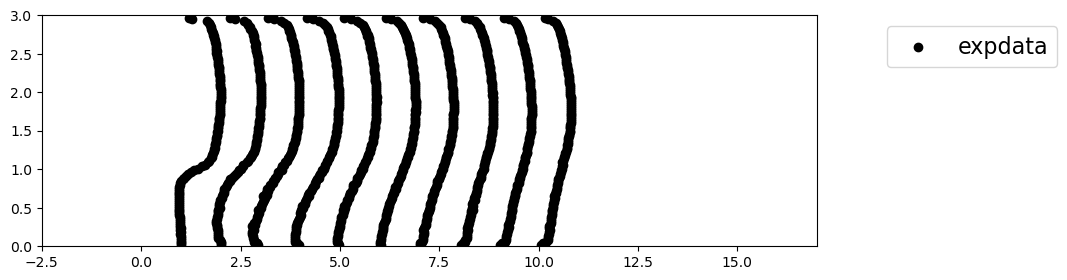

In [170]:
"""gnuplot
"< awk -F ',' 'NR==1105,NR==1185 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale):1 title "Exp" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1188,NR==1309 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+1):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1312,NR==1433 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+2):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1436,NR==1557 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+3):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1560,NR==1681 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+4):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1684,NR==1805 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+5):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1808,NR==1929 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+6):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==1932,NR==2053 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+7):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==2056,NR==2177 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+8):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==2180,NR==2301 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+9):1 title "" with p pt 6 lc rgb "red",\
"< awk -F ',' 'NR==2304,NR==2425 {print $2,$4}' exptData/fc_bs007.csv" using ($2/scale+10):1 title "" with p pt 6 lc rgb "red",\
"""
# 実験データをデータフレームの取得する行をリスト化
data_list = [
    {'start_row': 1188, 'end_row':1309},
    {'start_row': 1312, 'end_row':1433},
    {'start_row': 1436, 'end_row':1557},
    {'start_row': 1560, 'end_row':1681},
    {'start_row': 1684, 'end_row':1805},
    {'start_row': 1808, 'end_row':1929},
    {'start_row': 1932, 'end_row':2053},
    {'start_row': 2056, 'end_row':2177},
    {'start_row': 2180, 'end_row':2301},
    {'start_row': 2304, 'end_row':2425}
]
# グラフのセット    
fig, axes = plt.subplots(1, 1, figsize=(10,3))
# 軸の範囲の設定
axes.set_xlim([-2.5, 17])
axes.set_ylim([0, 3])

for i, data in enumerate(data_list):
    start_row = data_list[i]['start_row']
    end_row = data_list[i]['end_row']
    nrows = end_row - start_row+1
    
    df_exp = pd.read_csv("../exptData/fc_bs007.csv", skiprows=range(1, start_row-2), nrows=nrows, header=1)#, names=('x/H[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))


    if i != len(data_list) - 1:
        axes.scatter(df_exp["U/Uc"].values+ df_exp["x/H"].values, df_exp["y/H"], color="black")
    else:
        axes.scatter(df_exp["U/Uc"].values + df_exp["x/H"].values, df_exp["y/H"], color="black", label="expdata")

    
axes.legend(loc="upper center",bbox_to_anchor=(1.2, 1.0), fontsize=16)

# OpenFOAMと実験データの比較（○○mの速度分布）

先程グラフ化したOpenFOAMの結果と実験データとを重ねてグラフ化する

Text(0.5, 0, 'x/H')

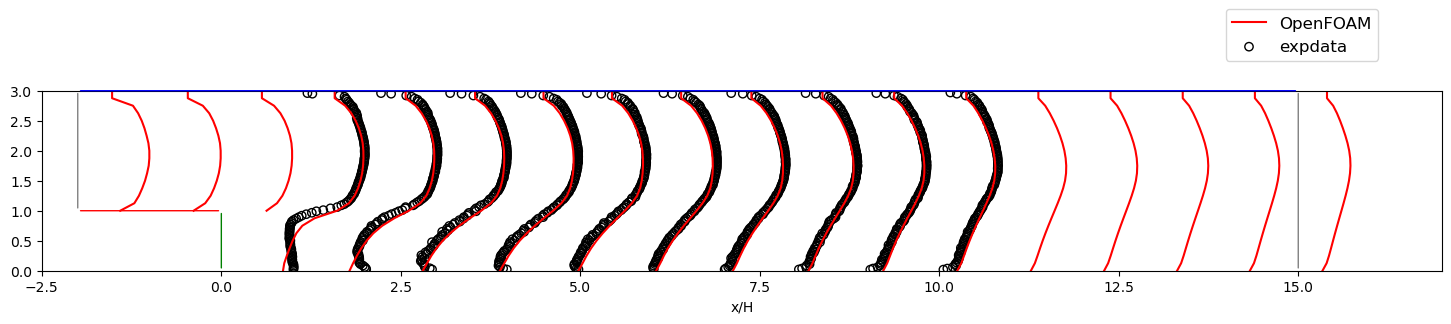

In [200]:
# グラフのセット    
fig, axes = plt.subplots(1, 1, figsize=(14,3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.6)

# 軸の範囲の設定
axes.set_xlim([-2.5, 17])
axes.set_ylim([0, 3])


# 枠の始点と終点をリスト化
point_list = [
    {'start': [-2, 3],'end': [15, 3], 'color': 'blue'},
    {'start': [-2, 1],'end': [ 0, 1], 'color': 'red'},
    {'start': [ 0, 1],'end': [ 0, 0], 'color': 'green'},
    {'start': [15, 0],'end': [15, 3], 'color': 'gray'},
    {'start': [-2, 1],'end': [-2, 3], 'color': 'gray'},
]

# 枠を作成
for point in point_list:
    axes.annotate('', xy=point['end'], xytext=point['start'],
                arrowprops=dict(arrowstyle='-', 
                                connectionstyle='arc3', 
                                facecolor=point['color'], 
                                edgecolor=point['color'])
           )

# 横軸：流速、縦軸：高さでプロット
for i, zCase in enumerate(caseList):
    match = re.search(r'(-?\d+)', zCase)
    if match:
        z_pos = int(match.group())
    else:
        print("No number found in the file name.")
    
    # OpenFOAMのデータをデータフレームで取得
    df_cae = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))
    if i != len(caseList) - 1:
        axes.plot(df_cae["Ux[m/s]"].values +z_pos, df_cae["y[m]"].values, color="red")
    else:
        axes.plot(df_cae["Ux[m/s]"].values +z_pos, df_cae["y[m]"].values, color="red", label="OpenFOAM")



# 実験データをデータフレームの取得する行をリスト化
data_list = [
    {'start_row': 1188, 'end_row':1309},
    {'start_row': 1312, 'end_row':1433},
    {'start_row': 1436, 'end_row':1557},
    {'start_row': 1560, 'end_row':1681},
    {'start_row': 1684, 'end_row':1805},
    {'start_row': 1808, 'end_row':1929},
    {'start_row': 1932, 'end_row':2053},
    {'start_row': 2056, 'end_row':2177},
    {'start_row': 2180, 'end_row':2301},
    {'start_row': 2304, 'end_row':2425}
]

for i, data in enumerate(data_list):
    start_row = data_list[i]['start_row']
    end_row = data_list[i]['end_row']
    nrows = end_row - start_row+1
    
    df_exp = pd.read_csv("../exptData/fc_bs007.csv", skiprows=range(1, start_row-2), nrows=nrows, header=1)
    
    if i != len(data_list) - 1:
        axes.scatter(df_exp["U/Uc"].values + df_exp["x/H"].values,df_exp["y/H"].values, color="black", marker='o', edgecolors='black', facecolors='none')
    else:
        axes.scatter(df_exp["U/Uc"].values + df_exp["x/H"].values,df_exp["y/H"].values, color="black", marker='o', edgecolors='black', facecolors='none',  label="expdata")

axes.legend(loc="upper center",bbox_to_anchor=(0.9, 1.5), fontsize=12)
axes.set_xlabel("x/H")

# 以上をまとめてスクリプト化して実行する

terminalで「101_baskstep/001_backstep/python_plot」へ移動する。

※以下は絶対パスで記述している
<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-family: monospace;">
cd /home/dexcs/Desktop/run/101_baskstep/001_backstep/python_plot
</div>

```bash
.
├── plot.ipynb
├── plot.png
└── plot.py
```

plot.pyには以下のようにスクリプト化している

```python
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
from pathlib import Path

# 文字列を含む要素を数字で昇順にする関数
def atoi(text):
    print(text)
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)^', text) ]

# 数字であるかどうかの判定
def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def custom_sort_key(file_name):
    # ファイル名から数字部分を抽出して返す
    match = re.search(r'(-?\d+)', file_name)
    if match:
        return int(match.group())
    return file_name
    
    
# ファイル名を数字部分と非数字部分に分割するための正規表現パターン
pattern = r'(\d*\.\d+|\d+)'
resultDir = Path("../postProcessing/sampleDict")  # 計算フォルダ
latestTime = sorted([a for a in os.listdir(resultDir) if is_int(a)], key=float)[-1] # latestTimeを抜き出す
sampleDictdata = resultDir/ latestTime

# x=からはじまるデータのみが必要
caseList = [data for data in os.listdir(sampleDictdata) if "x=" in data]
caseList = sorted(caseList, key=custom_sort_key)

# グラフのセット    
fig, axes = plt.subplots(1, 1, figsize=(16,6))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.6)  # 余白を調整

# 軸の範囲の設定
axes.set_xlim([-2.5, 17])
axes.set_ylim([0, 3])


# 枠の始点と終点をリスト化
point_list = [
    {'start': [-2, 3],'end': [15, 3], 'color': 'blue'},
    {'start': [-2, 1],'end': [ 0, 1], 'color': 'red'},
    {'start': [ 0, 1],'end': [ 0, 0], 'color': 'green'},
    {'start': [15, 0],'end': [15, 3], 'color': 'gray'},
    {'start': [-2, 1],'end': [-2, 3], 'color': 'gray'},
]

# 枠を作成
for point in point_list:
    axes.annotate('', xy=point['end'], xytext=point['start'],
                arrowprops=dict(arrowstyle='-', 
                                connectionstyle='arc3', 
                                facecolor=point['color'], 
                                edgecolor=point['color'])
           )

# 横軸：流速、縦軸：高さでプロット
for i, zCase in enumerate(caseList):
    match = re.search(r'(-?\d+)', zCase)
    if match:
        z_pos = int(match.group())
    else:
        print("No number found in the file name.")
    
    # OpenFOAMのデータをデータフレームで取得
    df_cae = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'k[m2/s2]', 'Ux[m/s]', 'Uy[m/s]', 'Uz[m/s]'))
    if i != len(caseList) - 1:
        axes.scatter(df_cae["Ux[m/s]"] + z_pos, df_cae["y[m]"], color="red")
    else:
        axes.scatter(df_cae["Ux[m/s]"] + z_pos, df_cae["y[m]"], color="red", label="OpenFOAM")



# 実験データをデータフレームの取得する行をリスト化
data_list = [
    {'start_row': 1188, 'end_row':1309},
    {'start_row': 1312, 'end_row':1433},
    {'start_row': 1436, 'end_row':1557},
    {'start_row': 1560, 'end_row':1681},
    {'start_row': 1684, 'end_row':1805},
    {'start_row': 1808, 'end_row':1929},
    {'start_row': 1932, 'end_row':2053},
    {'start_row': 2056, 'end_row':2177},
    {'start_row': 2180, 'end_row':2301},
    {'start_row': 2304, 'end_row':2425}
]

for i, data in enumerate(data_list):
    start_row = data_list[i]['start_row']
    end_row = data_list[i]['end_row']
    nrows = end_row - start_row+1
    
    df_exp = pd.read_csv("../exptData/fc_bs007.csv", skiprows=range(1, start_row-2), nrows=nrows, header=1)
    
    if i != len(data_list) - 1:
        axes.scatter(df_exp["U/Uc"].values + df_exp["x/H"].values,df_exp["y/H"].values, color="black", marker='o', edgecolors='black', facecolors='none')
    else:
        axes.scatter(df_exp["U/Uc"].values + df_exp["x/H"].values,df_exp["y/H"].values, color="black", marker='o', edgecolors='black', facecolors='none',  label="expdata")

axes.legend(loc="upper center",bbox_to_anchor=(0.9, 1.5), fontsize=12)
axes.set_xlabel("x/H")
axes.grid('-')

plt.savefig("plot.png")

```

以下のコマンドでpythonを実行

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-family: monospace;">
python3   plot.py
</div>

plot.pngにグラフが出力



<img src="plot.png">